In [21]:
import glob
import torch
from torch.utils import data
from PIL import Image
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
import pandas as pd
#test

In [10]:
#通过创建data.Dataset子类Mydataset来创建输入
class Mydataset(data.Dataset):
# 类初始化
    def __init__(self, root):
        self.imgs_path = root
# 进行切片
    def __getitem__(self, index):
        img_path = self.imgs_path[index]
        return img_path
# 返回长度
    def __len__(self):
        return len(self.imgs_path)


In [17]:
#使用glob方法来获取数据图片的所有路径
all_imgs_path = glob.glob(r'/home/lyc/doc/AML_LAB/imu_data/*.csv')#数据文件夹路径，根据实际情况更改！
#循环遍历输出列表中的每个元素，显示出每个图片的路径


#利用自定义类Mydataset创建对象weather_dataset
signature_dataset = Mydataset(all_imgs_path)
print(len(signature_dataset)) #返回文件夹中图片总个数
print(signature_dataset[12:15])#切片，显示第12至第十五张图片的路径
sinature_datalodaer = torch.utils.data.DataLoader(signature_dataset, batch_size=5) #每次迭代时返回五个数据
print(next(iter(sinature_datalodaer)))

species = ['False','True']
species_to_id = dict((c, i) for i, c in enumerate(species))
print(species_to_id)
id_to_species = dict((v, k) for k, v in species_to_id.items())
print(id_to_species)
all_labels = []
#对所有图片路径进行迭代
for img in all_imgs_path:
    # 区分出每个img，应该属于什么类别
    for i, c in enumerate(species):
        if c in img:
            all_labels.append(i)
print(all_labels) #得到所有标签


60
['/home/lyc/doc/AML_LAB/imu_data/True_1zimo.csv', '/home/lyc/doc/AML_LAB/imu_data/False_1xizhi.csv', '/home/lyc/doc/AML_LAB/imu_data/True_9xizhi.csv']
['/home/lyc/doc/AML_LAB/imu_data/True_8zimo.csv', '/home/lyc/doc/AML_LAB/imu_data/False_6zimo.csv', '/home/lyc/doc/AML_LAB/imu_data/True_1che.csv', '/home/lyc/doc/AML_LAB/imu_data/True_2xizhi.csv', '/home/lyc/doc/AML_LAB/imu_data/True_4zimo.csv']
{'False': 0, 'True': 1}
{0: 'False', 1: 'True'}
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]


## 训练

## kaishi

In [24]:
True_list=[]
False_list=[]
for i in range(1,11):
    True_list.append('imu_data/True_%dxizhi.csv'%i)
    False_list.append('imu_data/False_%dxizhi.csv'%i)
    True_list.append('imu_data/True_%dche.csv'%i)
    False_list.append('imu_data/False_%dche.csv'%i)
    True_list.append('imu_data/True_%dzimo.csv'%i)
    False_list.append('imu_data/False_%dzimo.csv'%i)
print(True_list)

['imu_data/True_1xizhi.csv', 'imu_data/True_1che.csv', 'imu_data/True_1zimo.csv', 'imu_data/True_2xizhi.csv', 'imu_data/True_2che.csv', 'imu_data/True_2zimo.csv', 'imu_data/True_3xizhi.csv', 'imu_data/True_3che.csv', 'imu_data/True_3zimo.csv', 'imu_data/True_4xizhi.csv', 'imu_data/True_4che.csv', 'imu_data/True_4zimo.csv', 'imu_data/True_5xizhi.csv', 'imu_data/True_5che.csv', 'imu_data/True_5zimo.csv', 'imu_data/True_6xizhi.csv', 'imu_data/True_6che.csv', 'imu_data/True_6zimo.csv', 'imu_data/True_7xizhi.csv', 'imu_data/True_7che.csv', 'imu_data/True_7zimo.csv', 'imu_data/True_8xizhi.csv', 'imu_data/True_8che.csv', 'imu_data/True_8zimo.csv', 'imu_data/True_9xizhi.csv', 'imu_data/True_9che.csv', 'imu_data/True_9zimo.csv', 'imu_data/True_10xizhi.csv', 'imu_data/True_10che.csv', 'imu_data/True_10zimo.csv']


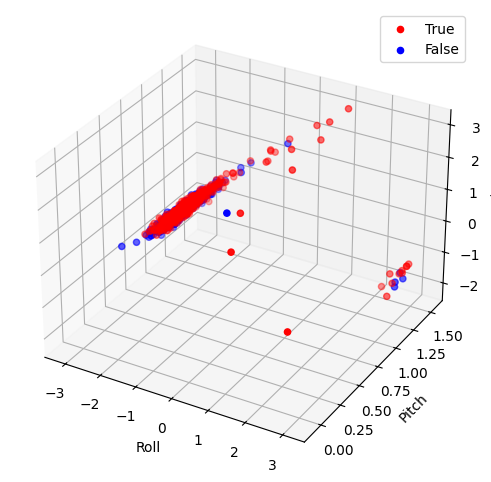

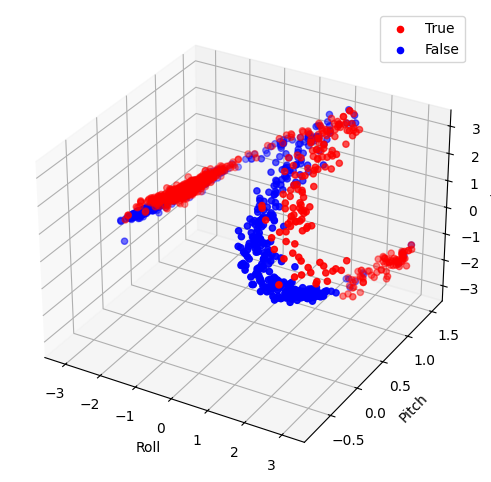

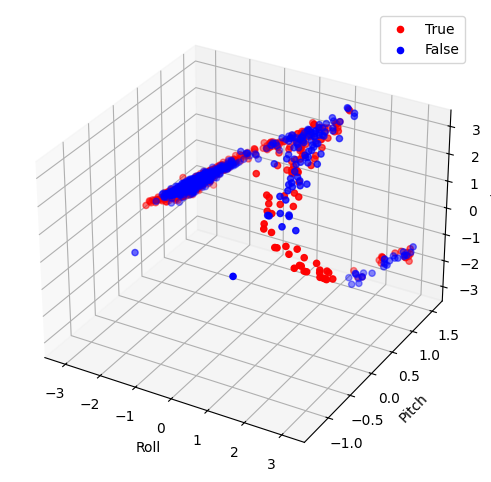

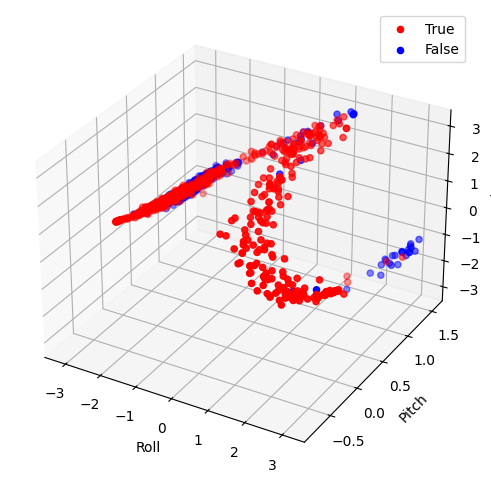

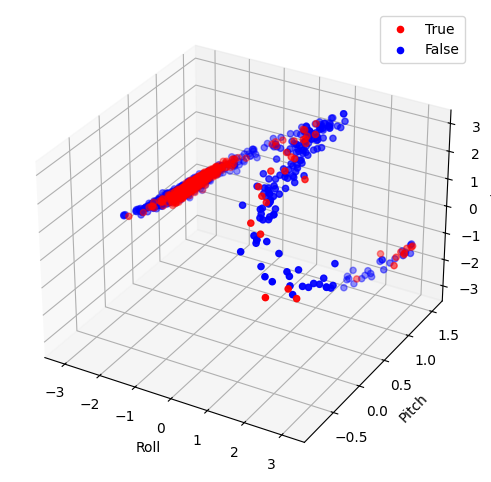

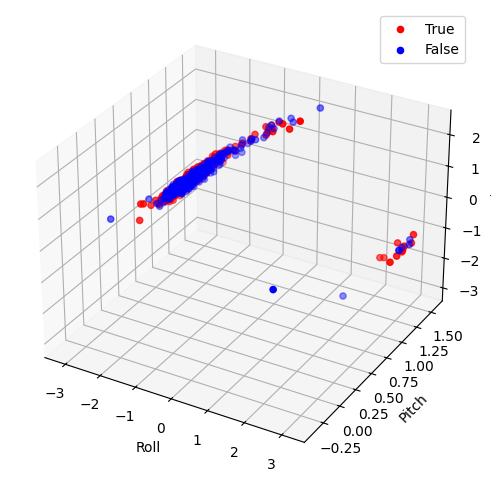

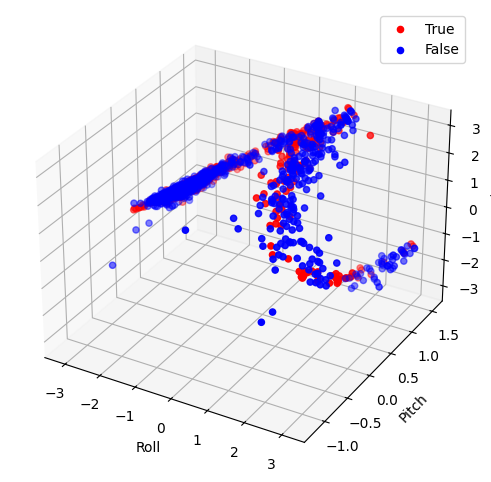

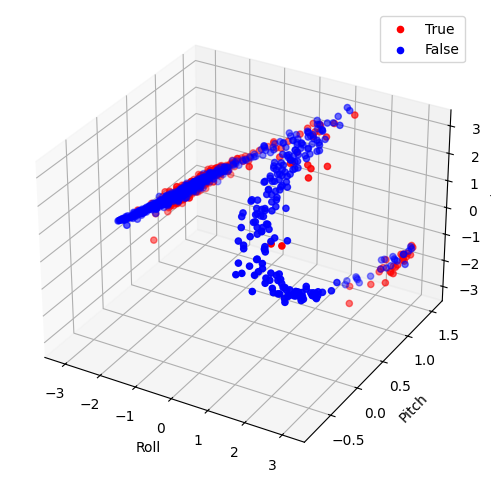

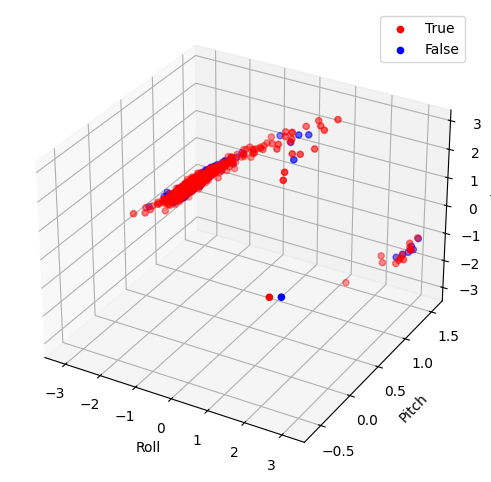

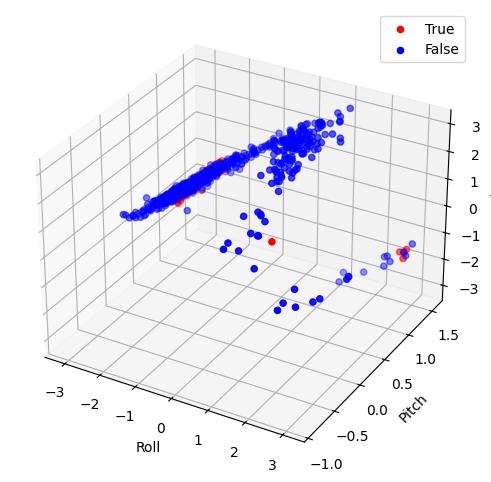

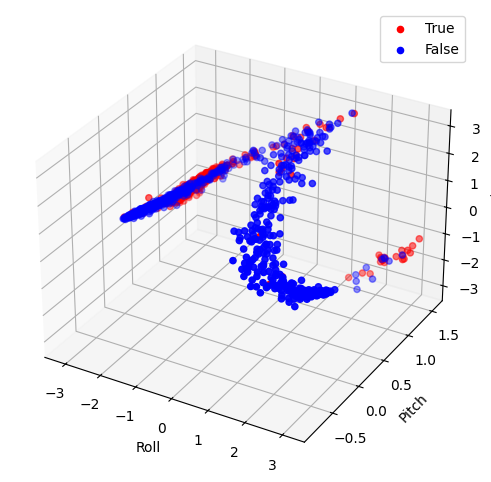

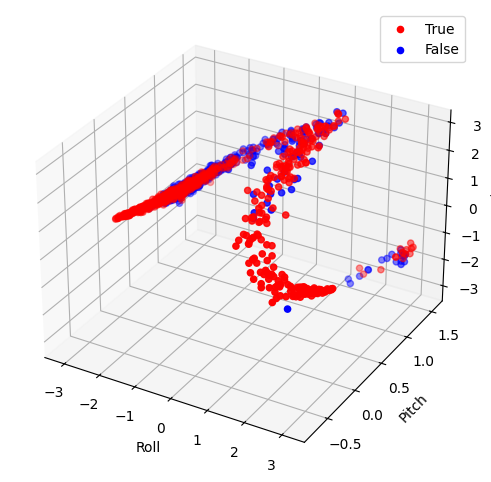

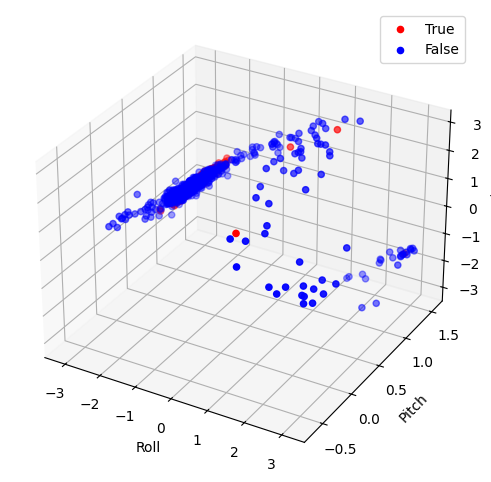

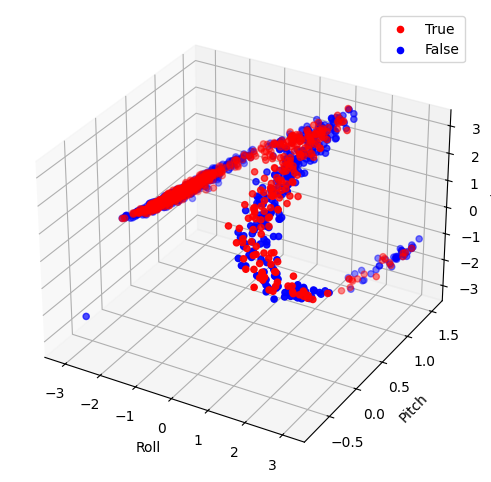

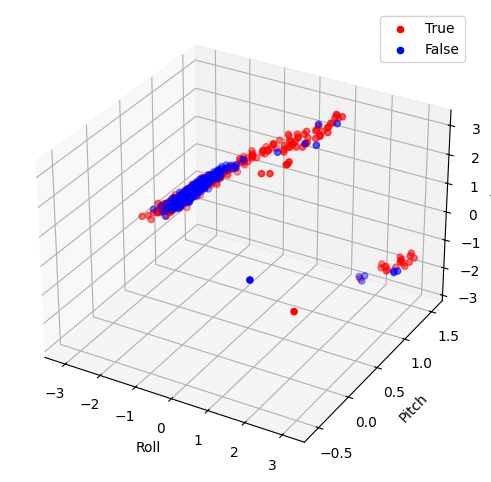

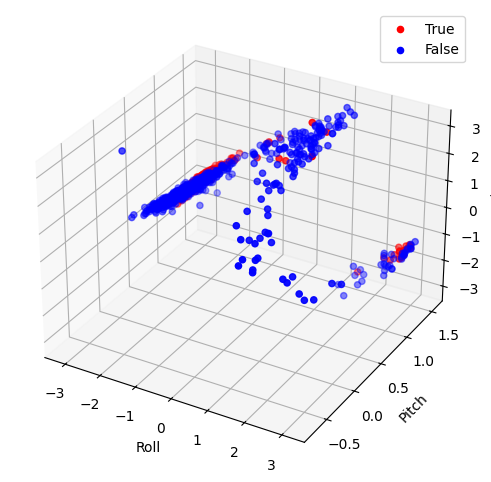

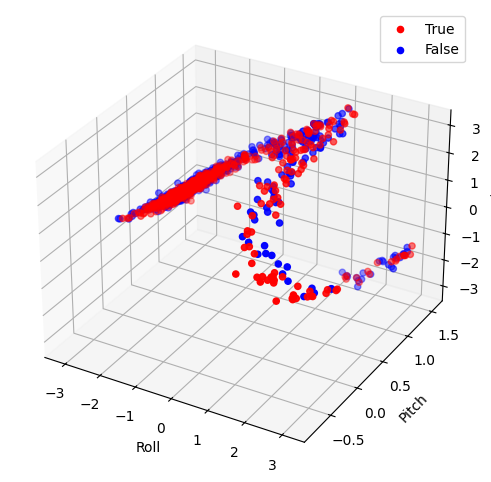

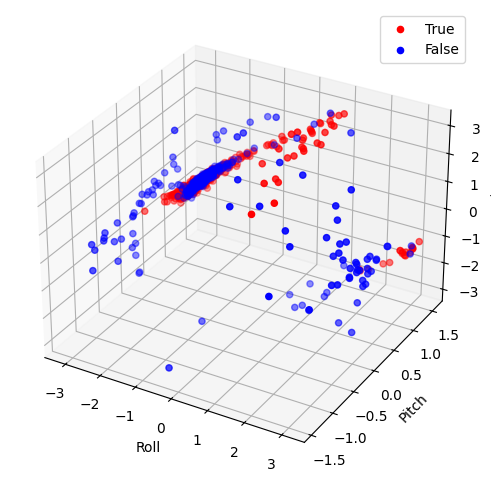

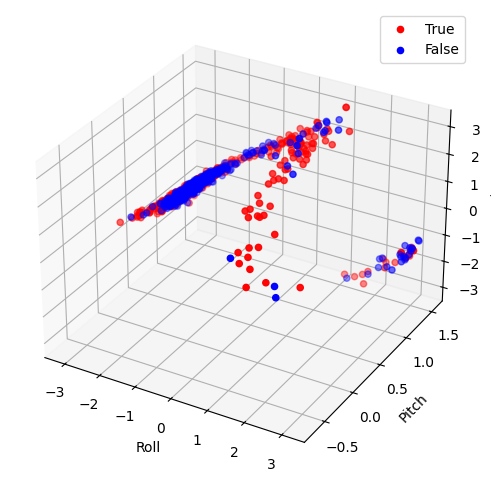

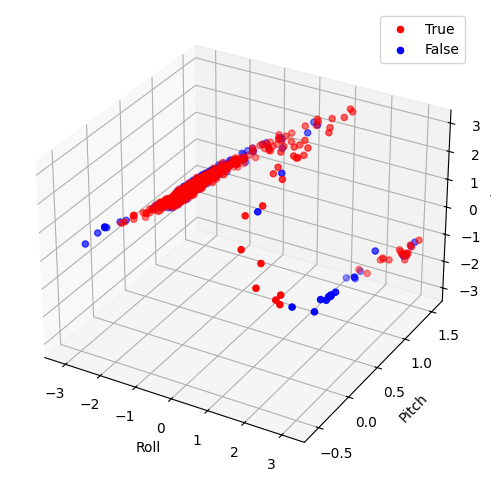

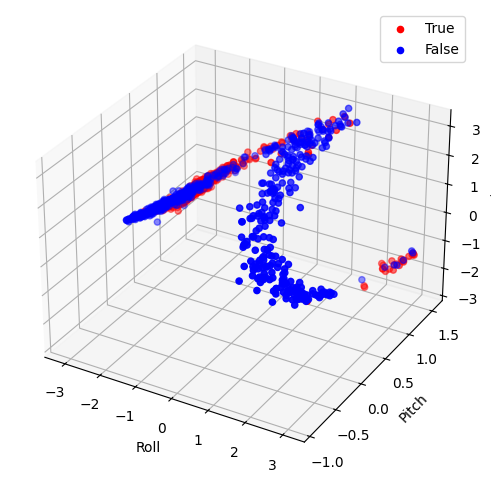

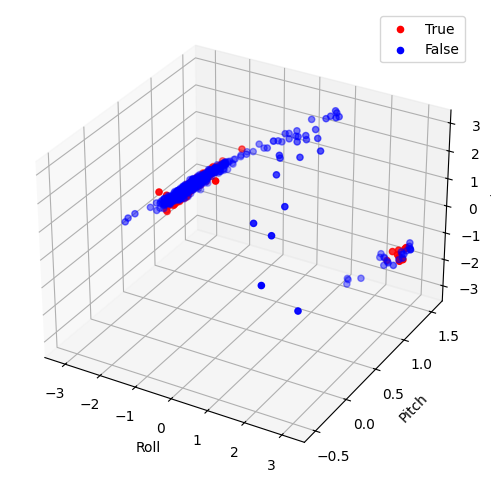

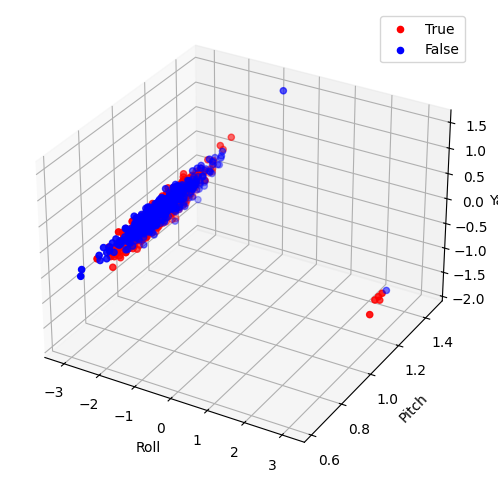

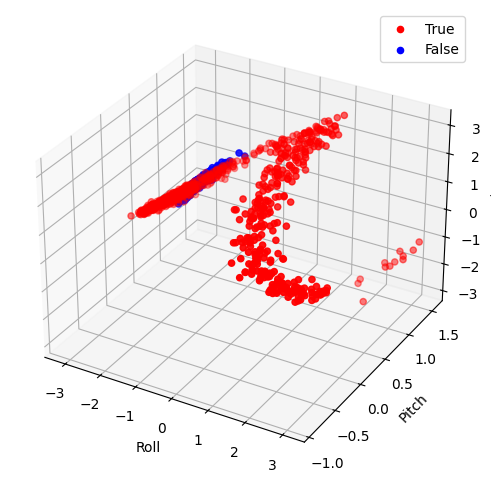

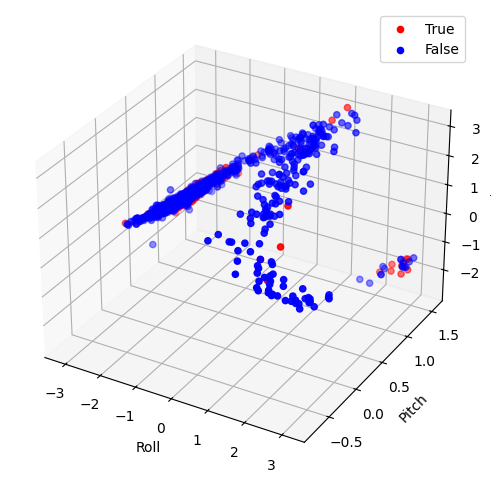

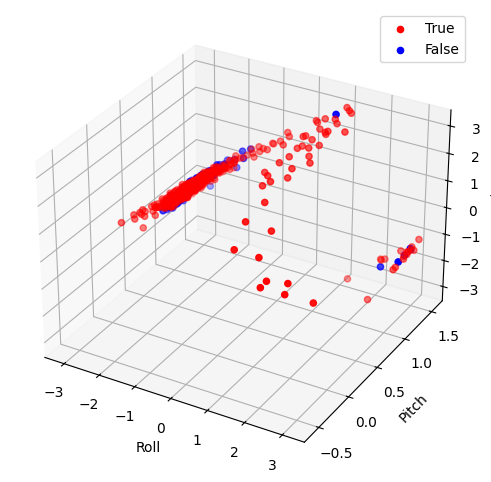

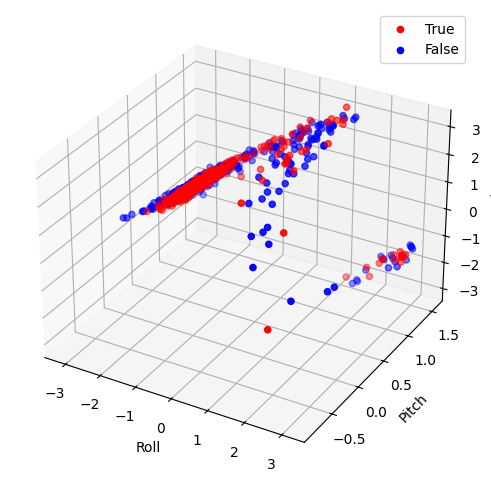

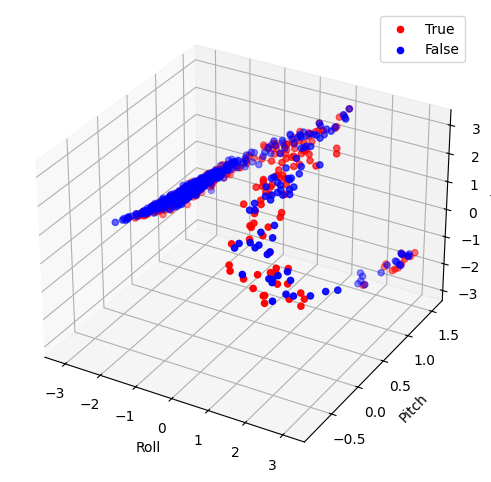

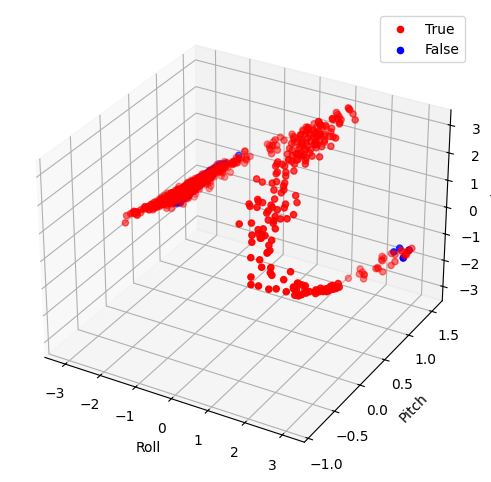

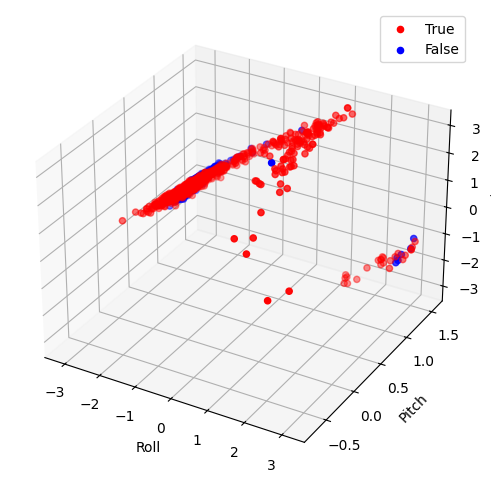

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# 假设True_list和False_list包含文件路径列表

# 仅选择前6个文件进行示例
for ori, vary in zip(True_list[:], False_list[:]):
    # 创建一个新的图形
    fig = plt.figure(figsize=(18, 6))
    ax = fig.add_subplot(111, projection='3d')

    # 读取True数据并绘制散点图（红色）
    df_true = pd.read_csv(ori)
    x_true = df_true['roll']
    y_true = df_true['pitch']
    z_true = df_true['yaw']
    ax.scatter(x_true, y_true, z_true, c='r', marker='o', label='True')

    # 读取False数据并绘制散点图（蓝色）
    df_false = pd.read_csv(vary)
    x_false = df_false['roll']
    y_false = df_false['pitch']
    z_false = df_false['yaw']
    ax.scatter(x_false, y_false, z_false, c='b', marker='o', label='False')

    # 设置坐标轴标签
    ax.set_xlabel('Roll')
    ax.set_ylabel('Pitch')
    ax.set_zlabel('Yaw')

    # 添加图例
    ax.legend()

    # 显示图形
    plt.show()


In [4]:
for i in range(1,11):
    True_list.append('AML_LAB/imu_data/True_%dche.csv'%i)
    False_list.append('AML_LAB/imu_data/False_%dche.csv'%i)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 假设True_list和False_list包含文件路径列表

# 创建一个空的DataFrame来存储所有数据
data = pd.DataFrame()

# 加载True数据并添加标签
for ori in True_list[:]:
    df = pd.read_csv(ori)
    df['label'] = 1  # True数据标签为1
    data = pd.concat([data, df], ignore_index=True)

# 加载False数据并添加标签
for vary in False_list[:]:
    df = pd.read_csv(vary)
    df['label'] = 0  # False数据标签为0
    data = pd.concat([data, df], ignore_index=True)

# 提取特征和标签
X = data[['roll', 'pitch', 'yaw']]
y = data['label']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=40)

# 创建并训练随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 预测测试集
y_pred = rf_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ", accuracy)


accuracy:  0.6447244094488189


In [1]:
!git clone https://github.com/Lycho556/AML_LAB.git

Cloning into 'AML_LAB'...
